In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cmcrameri import cm

from plot_utils import rcparams
plt.rcParams.update(rcparams)

In [2]:
weighted_quantiles = np.loadtxt('weighted_quantiles/weighted_quantiles_m_r.dat')

weighted_quantiles_combined_10 = np.loadtxt('weighted_quantiles/weighted_quantiles_combined_m_r_10.dat')

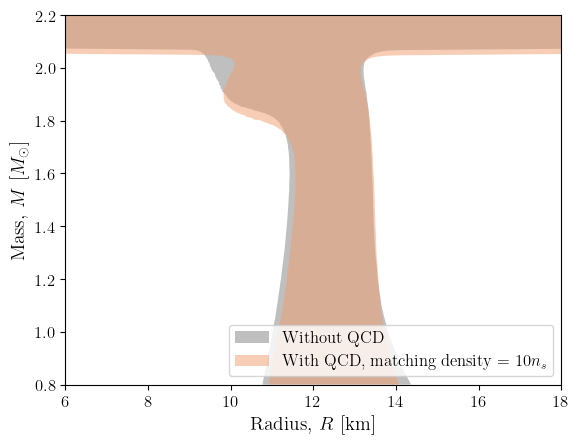

In [3]:
mass_grid = np.linspace(0.8, 2.2, 1000)

fig, ax = plt.subplots()
    
ax.fill_betweenx(
    mass_grid, 
    weighted_quantiles[0], 
    weighted_quantiles[2], 
    alpha=0.25, 
    color='k', 
    edgecolor=None,
    label='Without QCD'
    )

# ax.fill_between(
#     energy_density_grid, 
#     weighted_quantiles_combined_7[0], 
#     weighted_quantiles_combined_7[2], 
#     alpha=0.5, 
#     color=cm.batlow(0.25), 
#     edgecolor=None,
#     label='With QCD, matching density $=7n_s$'
#     )

ax.fill_betweenx(
    mass_grid, 
    weighted_quantiles_combined_10[0], 
    weighted_quantiles_combined_10[2], 
    alpha=0.5, 
    color=cm.batlow(0.75), 
    edgecolor=None,
    label='With QCD, matching density $=10n_s$'
    )

ax.legend(loc='lower right')

ax.set_xlim(6, 18)
ax.set_ylim(0.8, 2.2)

ax.set_xlabel('Radius, $R$ [km]')
ax.set_ylabel('Mass, $M$ [$M_\odot$]')

fig.savefig('mass_vs_radius.pdf', bbox_inches='tight')